In [42]:
import statistics
import math
import numpy as np
import fractions

In [43]:
#Samples given 
x = [1.01, 0.99, 0.78, 1.12, 1.20, 0.86, 0.65, 0.56,
    0.87, 0.63, 0.7, 1.24, 1.4]

In [44]:
def no_of_samples(list):
    count = 0
    for element in list:
        count += 1
    return count
print("No. of Samples is:", no_of_samples(x))

No. of Samples is: 13


In [94]:
#Function that will calculate the regular harmonic mean of our dataset. 
def harmonic_mean(*numbers):
    reciprocals = []
    for i in numbers:
        reciprocals.append(1/i)
    avg = sum(reciprocals)/len(numbers)
    hm_decimal = 1/avg
    return (round(hm_decimal,4))

In [92]:
#We define a function called pseudovalues that will create a list of harmonic means by removing one data sample from dataset at each iterations. 
#for the index and value pair we loop through all the item in dataset. enumerate gives the samples a index, pair of (index, value)
def pseudovalues(list):
    vals=[]
    for index, values in enumerate(list):
        hm_pseudo = [1/y for i,y in enumerate(list) if i!=index]
        vals.append((len(list)-1)/sum(hm_pseudo))
    return vals

In [93]:
pseudovalues(x)

[0.8455858177734364,
 0.8467793114169977,
 0.8633470759118885,
 0.8398311308412671,
 0.836347052019475,
 0.8560023420716846,
 0.8795730768509937,
 0.8958078669988685,
 0.855187005174978,
 0.8827331432198184,
 0.8725449900234676,
 0.8347830548264198,
 0.8294649039325938]

In [79]:
HM = harmonic_mean(1.01, 0.99, 0.78, 1.12, 1.20, 0.86, 0.65, 0.56,
    0.87, 0.63, 0.7, 1.24, 1.4)
print(HM)

0.8563


In [80]:
vals = np.unique(x)

In [81]:
print(vals)

[0.56 0.63 0.65 0.7  0.78 0.86 0.87 0.99 1.01 1.12 1.2  1.24 1.4 ]


In [82]:
harmonic_mean(0.99, 0.78, 1.12, 1.20, 0.86, 0.65, 0.56, 0.87,
    0.63, 0.70, 1.24, 1.40)

0.8456

In [83]:
#Lets get more of the pseudo-harmonic values
y = pseudovalues(x)
arith_mean = statistics.mean(y)
am = round(arith_mean, 4)
am

0.8568

In [91]:
#Standard deviation formula based on the the paper. 
def stand_dev(ls):
    n = len(ls)
    mean = sum(ls) /n
    variance = sum((x - mean)**2 for x in ls)* (n-1)
    std_dev = variance ** 0.5
    return std_dev

In [85]:
stand_dev(y)
sd = round(stand_dev(y), 4)
sd

0.2491

In [107]:
#Confidence Interval
#13 is the length of data
#Use len(x) if the size of dataset is different.
C1 = round(HM - 1.782*(sd/math.sqrt(13)),4)
C2 = round(HM + 1.782*(sd/math.sqrt(13)),4)

In [108]:
print('Confidence interval for HM is: ', (C1,C2))

Confidence interval for HM is:  (0.7332, 0.9794)


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PrithviCS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


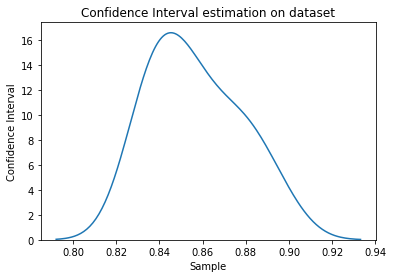

In [106]:
sns.distplot(y,hist=False)
plt.xlabel("Sample")
plt.ylabel("Confidence Interval")
plt.title("Confidence Interval estimation on dataset")
plt.show()